In [1]:
# code modified from here:
# https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/Full-Archive-Tweet-Counts/full_archive_tweet_counts.py

import os
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pylab as plt
import datetime
import seaborn as sns

In [2]:
savefig_settings = {'bbox_inches': 'tight', 'facecolor': 'w', 'dpi': 150}
idx = pd.IndexSlice

# count tweets per unique user

In [7]:
def get_tweet_data_field(files, field, path='./'):
    
    tweet_data = []
    
    for file in files:
        with open(os.path.join(path, file), "r") as f:

            for line in f.readlines():
                tweet = json.loads(line)
                if field in tweet:
                    tweet_data.append(tweet[field])

    return tweet_data

In [9]:
user_ids = get_tweet_data_field(["tweets_classified2.jsonl"], 'author_id', path='../classifier/')

In [16]:
no_tweets = len(user_ids)
print(no_tweets)
no_users = len(set(user_ids))
print(no_users)
print(no_tweets/no_users)

1467983
318531
4.6086032442682185


In [20]:
histogram = pd.Series(user_ids).value_counts().value_counts()

In [37]:
# users with more than 100 tweets
histogram[histogram.index > 100].sum()

1326

In [50]:
100* 1326 / no_users

0.4162860129783286

In [52]:
tweets_per_uid = pd.Series(user_ids).value_counts()
tweets_per_uid[tweets_per_uid.values > 100].sum()

516198

In [53]:
100 * 516198 / no_tweets

35.163758708377415

In [39]:
# percentage of users with only one tweet
histogram[1] / histogram.sum()

0.6323058038307103

<AxesSubplot:>

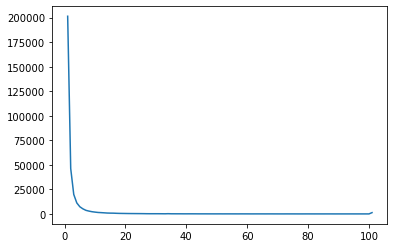

In [48]:
plot_histogram = histogram[histogram.index <= 100].sort_index()
plot_histogram[101] = histogram[histogram.index > 100].sum()
plot_histogram.plot()

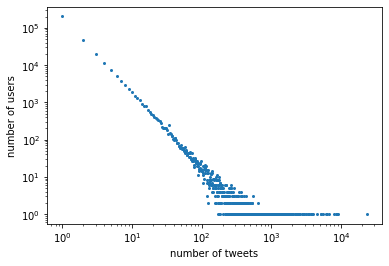

In [47]:
plt.scatter(histogram.index, histogram.values, s=4)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('number of users')
plt.xlabel('number of tweets')
plt.savefig("figures/users/tweets_per_user_histogram.png", **savefig_settings)

## explore data in jsonl file for details

In [3]:
tweets = []

with open("../classifier/tweets_classified2.jsonl", 'r') as f:
    i = 0
    
    for line in f.readlines():
        i += 1
        tweet = json.loads(line)
        tweets.append(tweet)
        
        if i > 1000:
            break

In [32]:
for tweet in tweets:
    #print(tweet['classes']['cardiff-sentiment'])
    em_dict = tweet['classes']['nrc']
    print(em_dict)
    key = max(em_dict, key=em_dict.get) if em_dict else None
    print(key)
    if key:
        print(em_dict[key])

{'fear': 0.07142857142857142, 'anger': 0.21428571428571427, 'negative': 0.21428571428571427, 'sadness': 0.21428571428571427, 'disgust': 0.21428571428571427, 'anticipation': 0.07142857142857142}
anger
0.21428571428571427
{}
None
{'positive': 1.0}
positive
1.0
{'fear': 0.07142857142857142, 'anger': 0.21428571428571427, 'negative': 0.21428571428571427, 'sadness': 0.21428571428571427, 'disgust': 0.21428571428571427, 'anticipation': 0.07142857142857142}
anger
0.21428571428571427
{'fear': 0.07142857142857142, 'anger': 0.21428571428571427, 'negative': 0.21428571428571427, 'sadness': 0.21428571428571427, 'disgust': 0.21428571428571427, 'anticipation': 0.07142857142857142}
anger
0.21428571428571427
{'positive': 1.0}
positive
1.0
{}
None
{}
None
{}
None
{'sadness': 1.0}
sadness
1.0
{}
None
{'anticipation': 1.0}
anticipation
1.0
{'fear': 0.5, 'anticipation': 0.5}
fear
0.5
{'anticipation': 1.0}
anticipation
1.0
{}
None
{}
None
{}
None
{'fear': 0.125, 'anger': 0.125, 'trust': 0.125, 'positive': 0.1

In [33]:
tweets[0]

{'referenced_tweets': [{'type': 'replied_to', 'id': '647550218771173376'}],
 'entities': {'urls': [{'start': 92,
    'end': 114,
    'url': 'http://t.co/65b0RLJrq4',
    'expanded_url': 'http://holmestead.ca/index-ct.html',
    'display_url': 'holmestead.ca/index-ct.html'},
   {'start': 116,
    'end': 138,
    'url': 'http://t.co/GcNqqhTfut',
    'expanded_url': 'http://www.agriculturedefensecoalition.org/content/weather-modification',
    'display_url': 'agriculturedefensecoalition.org/content/weathe…'}],
  'mentions': [{'start': 0,
    'end': 12,
    'username': 'lorabruncke',
    'id': '437673995'},
   {'start': 13, 'end': 17, 'username': 'WHO', 'id': '14499829'},
   {'start': 18, 'end': 31, 'username': 'OpChemtrails', 'id': '2783708485'},
   {'start': 33, 'end': 36, 'username': 'UN', 'id': '14159148'},
   {'start': 53, 'end': 64, 'username': 'Greenpeace', 'id': '3459051'}],
  'hashtags': [{'start': 42, 'end': 48, 'tag': 'COP21'},
   {'start': 76, 'end': 91, 'tag': 'Geoengineering'

In [1]:
# snippets from Tim's script

In [ ]:
import json
import re
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np
#from tqdm import tqdm

In [ ]:
models = ['cardiff-stance-climate', 'cardiff-offensive',  # 'cards',
          'cardiff-sentiment', 'bertweet-sentiment',
          'geomotions-orig', 'geomotions-ekman', 'cardiff-emotion', 'bertweet-emotions', 'nrc']

stats = {
    model: defaultdict(int)
    for model in models
}
cooc_stats = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(int))))

FILE_TWEETS = '../classifier/tweets_classified2.jsonl'
FILE_OUT = '/tweets_classified_new.csv'

with open(FILE_TWEETS, 'r') as f_in: #, \
#        open(FILE_OUT, 'w') as f_out:
    #f_out.write(','.join(models) + ',text\n')
    li = 0
    for line in f_in:#tqdm(f_in):
        li += 1
        tweet = json.loads(line)
        for model in models:
            labels = list(tweet['classes'][model].keys())
            #f_out.write('|'.join(labels) + ',')
            for label in labels:
                stats[model][label] += 1

            for model_cooc in models:
                if model_cooc != model:
                    labels_cooc = list(tweet['classes'][model_cooc].keys())
                    for label_cooc in labels_cooc:
                        for label in labels:
                            cooc_stats[model][label][model_cooc][label_cooc] += 1
        #f_out.write(re.sub(r'(\s+|,)', ' ', tweet['text']) + '\n')
        if li > 1000:
             break

print(stats)

In [ ]:
cooc_stats

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

        ax = plt.subplot(3,3,idx)

        cm = confusion_matrix([t['annotations_sub'].get(u1, 'UNK') for t in tweet_map.values()],
                              [t['annotations_sub'].get(u2, 'UNK') for t in tweet_map.values()],
                             labels=sorted(['UNK']+[v[0] for v in cat_map_sub.values()]))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                      display_labels=sorted(['UNK']+[v[0] for v in cat_map_sub.values()]))
        #disp = ConfusionMatrixDisplay.from_predictions(
        #    y_pred=[t['annotations_sub'].get(u1, 'UNK') for t in tweet_map.values()],
        #    y_test=[t['annotations_sub'].get(u2, 'UNK') for t in tweet_map.values()],
        #    display_labels=sorted(['UNK']+[v[0] for v in cat_map_sub.values()]))
        
        disp.plot(ax=ax)
        disp.ax_.tick_params(axis='x', rotation=90)
        ax.set_xlabel(u2)
        ax.set_ylabel(u1)

In [ ]:
# print(json.dumps(stats, indent=3))
# print(json.dumps(cooc_stats, indent=3))
print('plotting')
fig = plt.figure(figsize=(40, 40), dpi=120)
spi = 0
for i, model_i in enumerate(models):
    for j, model_j in enumerate(models):
        spi += 1
        if model_j != model_i:

            plt.subplot(len(models), len(models), spi, xmargin=10, ymargin=10)
            labels_i = sorted(list(cooc_stats[model_i].keys()), reverse=True)
            labels_j = sorted(list(cooc_stats[model_j].keys()), reverse=True)
            if model_i == 'cards':
                labels_i.remove('0_0')
            x = np.zeros((len(labels_i), len(labels_j)))
            for li, label_i in enumerate(labels_i):
                for lj, label_j in enumerate(labels_j):
                    x[li][lj] = cooc_stats[model_i][label_i][model_j][label_j]

            plt.imshow(x, interpolation='none')
            plt.ylabel(model_i, rotation=90)
            plt.xlabel(model_j)
            plt.xticks(np.arange(len(labels_j)), labels_j, rotation=90, fontsize=6)
            plt.yticks(np.arange(len(labels_i)), labels_i, fontsize=6)

print('layout+show')
fig.tight_layout()
plt.show()